In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:
import elastic
import constants
import potentials
import numpy as np
import pylab as plt
import json

In [3]:

r0       = 1e-9
pin      = 1e-4
intlimit = 100 * constants.BohrInAng/constants.hcInEVAngstrom
rhos = np.linspace(r0, intlimit, 100)

muH=constants.HydrogenConstants.mu
muT=constants.TritiumConstants.mu

aT=elastic.GetScatteringLength(rhos, pin, 0, muT, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom
aTT=elastic.GetScatteringLength(rhos, pin, 0, muT, potentials.Silvera_Triplet_T, 'Radau')*constants.hcInEVAngstrom

aH=elastic.GetScatteringLength(rhos, pin, 0, muH, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom
aHH=elastic.GetScatteringLength(rhos, pin, 0, muH, potentials.Silvera_Triplet_H, 'Radau')*constants.hcInEVAngstrom

aT=elastic.GetScatteringLength(rhos, pin, 0, muT, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom
aH=elastic.GetScatteringLength(rhos, pin, 0, muH, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom


sigT=elastic.GetCrossSection(rhos, pin, 0, muT, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom**2*1e-20
sigH=elastic.GetCrossSection(rhos, pin, 0, muH, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom**2*1e-20

In [4]:

aTT[-1]/aT[-1]


np.float64(1.0186443324488488)

In [5]:
aHH[-1]/aH[-1]

np.float64(0.9846628686029885)

In [6]:
print("No adiabatic correction")
print("H s-wave triplet scattering length in pm: " + str(aH[-1]*100))
print("T s-wave triplet scattering length in pm: " + str(aT[-1]*100))
print()
print("With adiabatic correction")
print("H s-wave triplet scattering length in pm: " + str(aHH[-1]*100))
print("T s-wave triplet scattering length in pm: " + str(aTT[-1]*100))


No adiabatic correction
H s-wave triplet scattering length in pm: 71.32577773182905
T s-wave triplet scattering length in pm: -4184.923693386094

With adiabatic correction
H s-wave triplet scattering length in pm: 70.23184490676195
T s-wave triplet scattering length in pm: -4262.948801998648


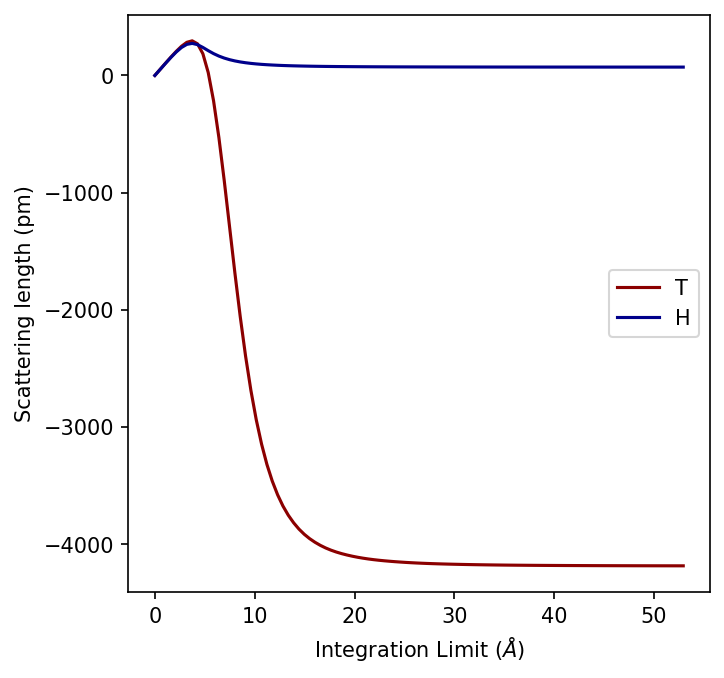

In [7]:
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel(r"Integration Limit ($\AA$)")
plt.ylabel("Scattering length (pm)")
plt.plot(rhos*constants.hcInEVAngstrom,aT*100,label='T',color='DarkRed')
plt.plot(rhos*constants.hcInEVAngstrom,aH*100,label='H',color='DarkBlue')
plt.legend(loc='center right')


In [8]:
ms=np.linspace(0.1,4,100)
aVsMT_noad=[]
aVsMT_ad=[]
for m in ms:

    def AdCorrectedPotential(R):
        return(potentials.ApplyCorrection(R, potentials.Silvera_Triplet, potentials.TripletCorrection, (1/m)))

    mu=m*constants.DaltonInEV/2
    aVsMT_noad.append(elastic.GetScatteringLength(rhos, pin, 0, mu, potentials.Silvera_Triplet, 'Radau')
                      [-1]*constants.hcInEVAngstrom*100)
    aVsMT_ad.append(elastic.GetScatteringLength(rhos, pin, 0, mu, AdCorrectedPotential, 'Radau')
                      [-1]*constants.hcInEVAngstrom*100)
aVsMT_noad=np.array(aVsMT_noad)
aVsMT_ad=np.array(aVsMT_ad)



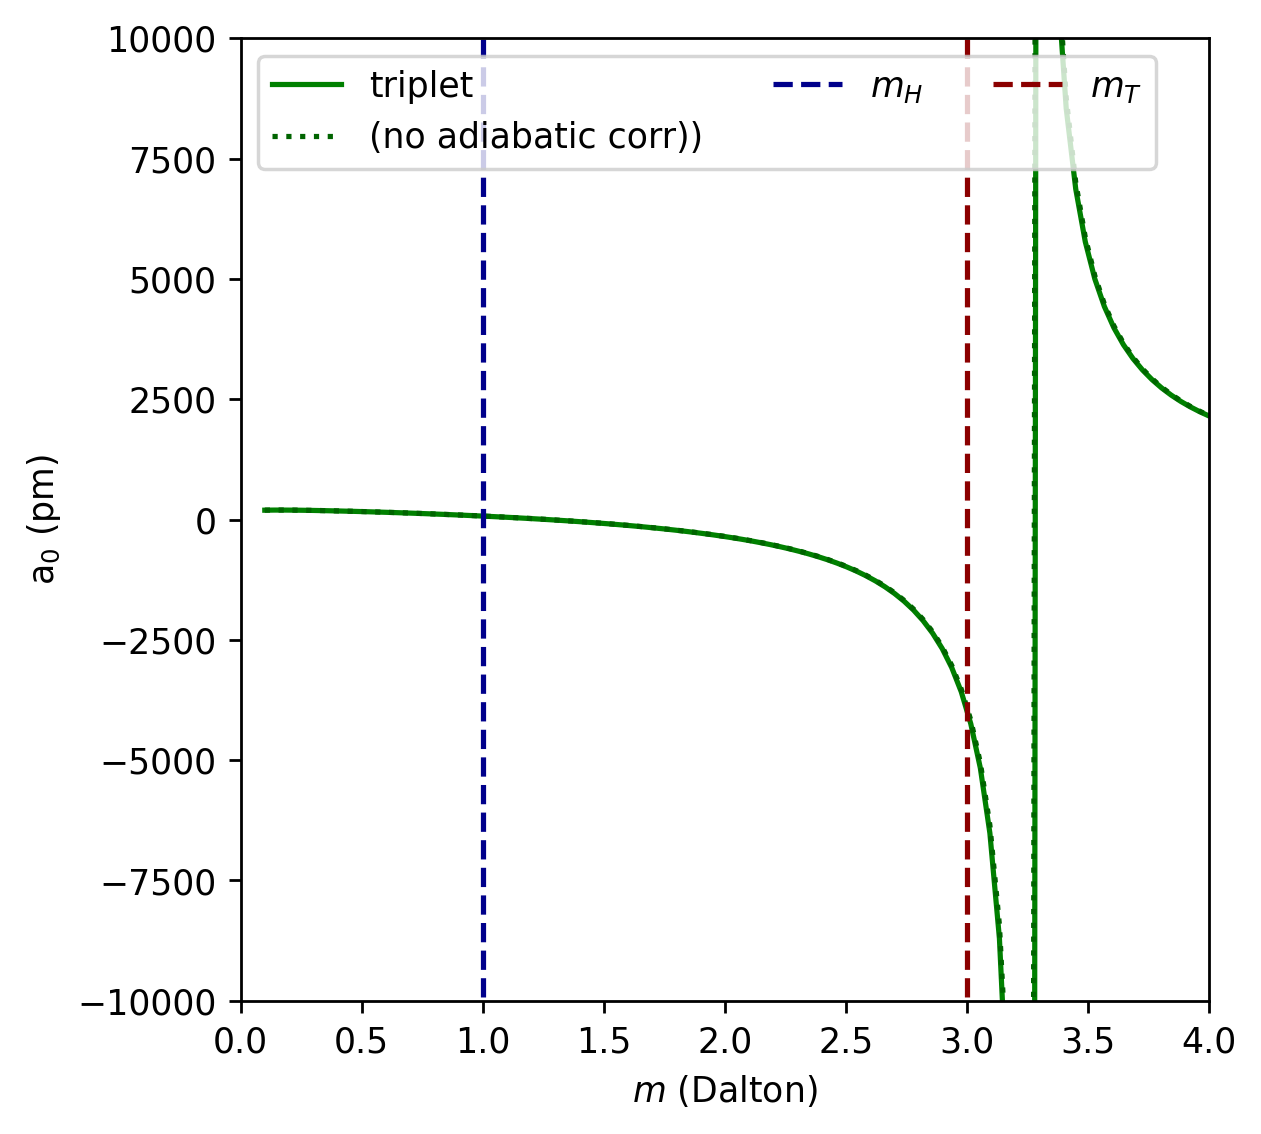

In [9]:

plt.figure(figsize=(5,5),dpi=250)
plt.xlabel("$m$ (Dalton)")
plt.ylabel(r"a$_0$ (pm)")
plt.plot(ms,aVsMT_ad,color='green',label=r'triplet')
plt.plot(ms,aVsMT_noad,':',color='DarkGreen',label=r'(no adiabatic corr))')
#plt.plot(ms,aVsMS,color='purple',label=r'singlet')
plt.plot([1,1],[-100000,45000],'--',color='DarkBlue',label=r'$m_H$')
plt.plot([3,3],[-100000,45000],'--',color='DarkRed',label=r'$m_T$')
plt.ylim(-10000,10000)
plt.legend(loc='upper left',ncol=3)
plt.xlim(0,4)
plt.savefig("./Plots/MassDependentElastic.png",dpi=250,bbox_inches='tight')

(0.96, 1.04)

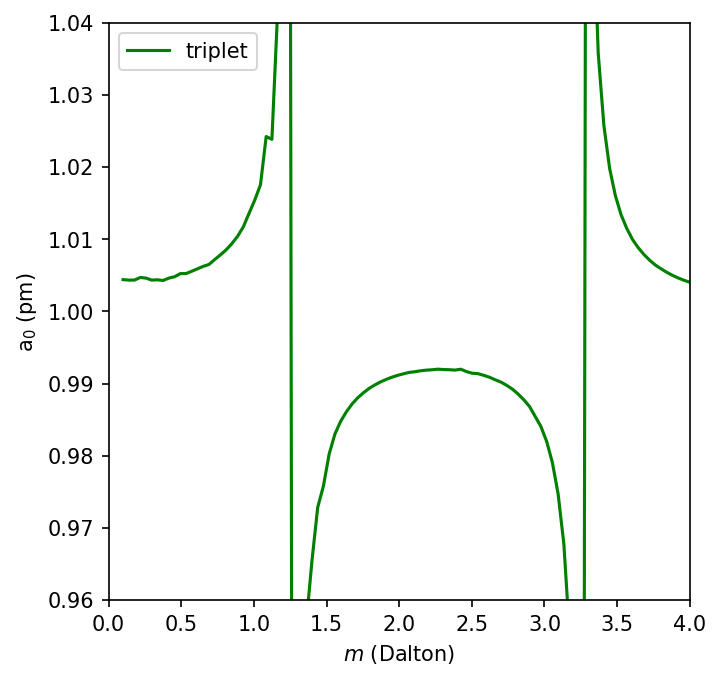

In [10]:
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel("$m$ (Dalton)")
plt.ylabel(r"a$_0$ (pm)")
plt.plot(ms,aVsMT_noad/aVsMT_ad,color='green',label=r'triplet')
#plt.plot(ms,aVsMS,color='purple',label=r'singlet')
#plt.plot([1,1],[-100000,45000],'--',color='DarkBlue',label=r'$m_H$')
#plt.plot([3,3],[-100000,45000],'--',color='DarkRed',label=r'$m_T$')
#plt.ylim(-10000,10000)
plt.legend(loc='upper left',ncol=3)
plt.xlim(0,4)
plt.ylim(0.96,1.04)

In [11]:
#Load in digitized data from Al Maaitah for overlay
from scipy.signal import savgol_filter
import os

json_path = os.path.join(
     "..", "src", "AtomicH", "LitReview", "Al_Maaitah_EX.json"
)
with open(json_path, "r") as f:
    data = json.load(f)

Al_Maaitah        = data["datasetColl"][0]["data"]     # first dataset in the file
k                 = np.array([pt["value"][0] for pt in Al_Maaitah])   # Å⁻¹
XS                = np.array([pt["value"][1] for pt in Al_Maaitah])   # Å²
XS_smooth         = savgol_filter(XS, window_length=5, polyorder=2)




In [12]:
#Calculate higher partial wave elastic cross sections
k_A  = np.linspace(1e-4, 4*constants.hcInEVAngstrom, 200)
k_eV = k_A / constants.hcInEVAngstrom

r0       = 1e-9
intlimit = 100 * constants.BohrInAng/constants.hcInEVAngstrom
rhos = np.linspace(r0, intlimit, 100)

muH=constants.HydrogenConstants.mu
muT=constants.TritiumConstants.mu

even_ls = np.arange(0, 16, 2)

sigma_T_by_l = {}
sigma_T_total = np.zeros_like(k_A)   # activate if you want Σ_l

for l in even_ls:
    sigma_T_partial = np.array([
        elastic.GetCrossSection(rhos, k, l, muT,
                                potentials.Silvera_Triplet, 'Radau')
        for k in k_A
    ])
    sigma_T_by_l[l] = sigma_T_partial
    sigma_T_total   += sigma_T_by_l[l]

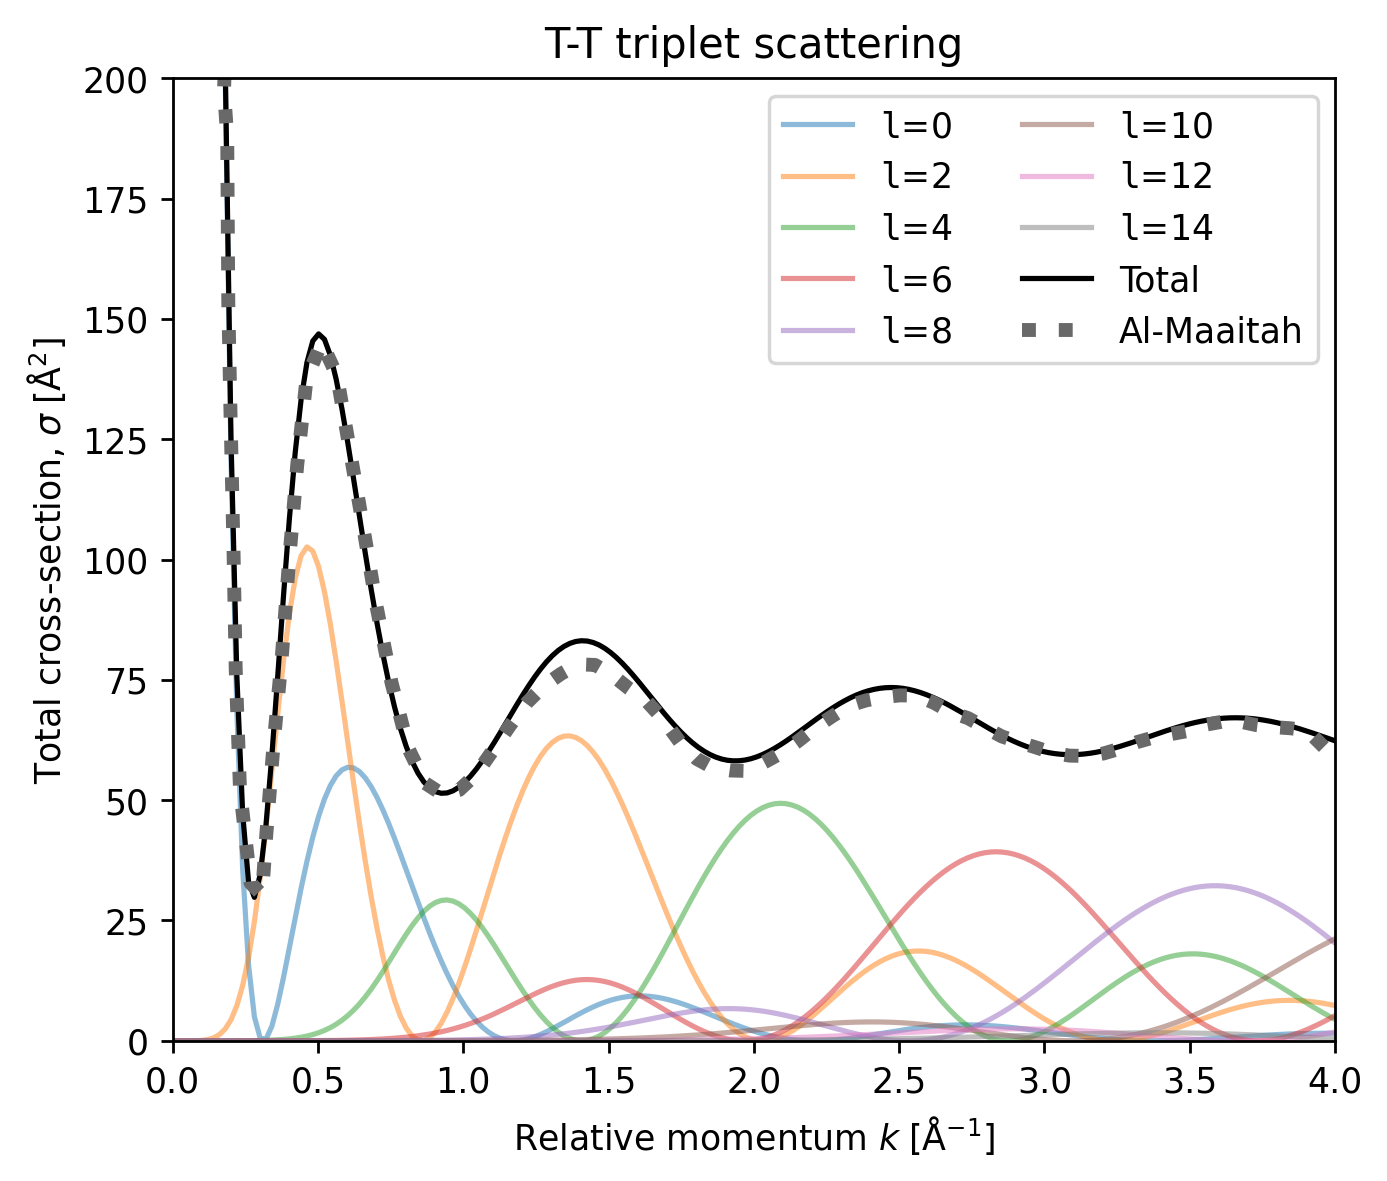

In [13]:


plt.figure(figsize=(6,5), dpi=250)
for l in sigma_T_by_l.keys():
    plt.plot(k_eV, np.array(sigma_T_by_l[l])* constants.hcInEVAngstrom**2,alpha=0.5,label=r'$\mathtt{l}$='+str(l))
plt.plot(k_eV, np.array(sigma_T_total) * constants.hcInEVAngstrom**2, label="Total",color='black')
plt.plot(k[0:-5],XS_smooth[0:-5], ':',label="Al-Maaitah",color='dimgrey',linewidth=4)
plt.xlabel(r'Relative momentum $k\;[\mathrm{\AA}^{-1}]$')
plt.ylabel(r'Total cross-section, $\sigma\;[\mathrm{\AA}^{2}]$')
plt.xlim(0, 4)
plt.ylim(0, 200)
plt.title("T-T triplet scattering")
plt.legend(ncol=2)
plt.savefig("./Plots/TTElastic.png",dpi=250,bbox_inches='tight')